<a href="https://colab.research.google.com/github/3boku/school_bigdata/blob/main/%EC%A0%95%ED%98%84%EC%84%9C_5_%EB%94%B0%EB%A6%89%EC%9D%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 그래프 폰트 설정  --> 런타임 다시 시작


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import os
os.kill(os.getpid(), 9)

In [5]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
# 마이너스 표시 문제
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family=font_name)

### 파일 오픈

In [4]:
#파일 오픈, encoding = 'utf-8'
import csv
f = open('/content/seoul_bike_20191001_07.csv',encoding ='cp949')
data = csv.reader(f)
header = next(data)
data = list(data)

In [6]:
#헤더출력
print(header)

['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리']


In [7]:
#상위 5개 데이터 출력
for row in data[:5]:
  print(row)

['SPB-25044', '2019-10-01 0:03', '1693', '원자력 병원', '10', '2019-10-01 0:24', '1610', '화랑대역 2번출구 앞', '6', '19', '2100']
['SPB-09411', '2019-10-01 0:05', '1447', '면목역 3번출구', '5', '2019-10-01 0:32', '1610', '화랑대역 2번출구 앞', '18', '26', '6480']
['SPB-06027', '2019-10-01 1:00', '1669', '중계역 3번출구', '3', '2019-10-01 1:41', '1610', '화랑대역 2번출구 앞', '13', '41', '4820']
['SPB-15620', '2019-10-01 2:39', '1681', '현대6차 아파트', '9', '2019-10-01 3:05', '1610', '화랑대역 2번출구 앞', '18', '25', '6170']
['SPB-06778', '2019-10-01 4:16', '3522', '사근삼거리', '3', '2019-10-01 5:16', '1610', '화랑대역 2번출구 앞', '19', '59', '12030']


In [ ]:
for row in data[:5]:
    print(row)

### 1. 따릉이는 어떤 시간에 많이 탈까?
0~23시에 각각 탑승 데이터가 몇개인지 리스트에 저장한 후 막대그래프 그리기


In [8]:
#시간 추출하기

time =[0 for i in range(24)]

for row in data:

  time[int(row[1][-5:-3])] += 1


time

[5742,
 4357,
 2962,
 1839,
 1183,
 1070,
 1739,
 4162,
 6718,
 4639,
 4169,
 4642,
 5260,
 5858,
 6722,
 7425,
 8441,
 10561,
 12630,
 10226,
 9740,
 9702,
 8584,
 6391]

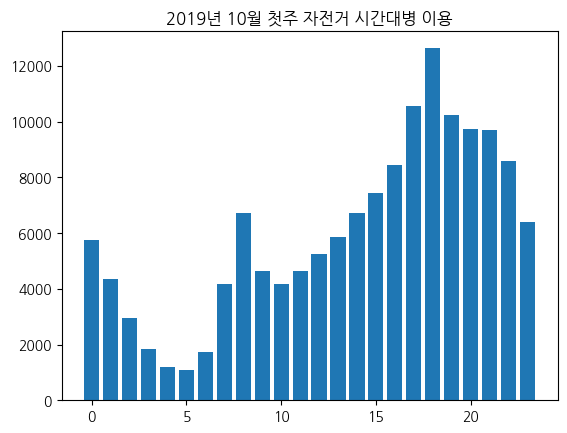

In [9]:
ride = [0 for i in range(24)]


#막대그래프 그리기

import matplotlib.pyplot as plt

plt.title('2019년 10월 첫주 자전거 시간대병 이용')
plt.bar(range(24),time)
plt.show()

### 2. 따릉이는 어떤 날에 가장 많이 탈까?

##### 일자 추출하기

In [11]:
#반납일시 추출

In [10]:
#일자만 추출
row[1][8:10]

'07'

##### 딕셔너리로 각 일자별 탑승 횟수 세기

In [12]:
bicycle = {}

for row in data:
  data = int(row[1][8:10])
  if data in bicycle:
    bicycle[data] += 1
  else :
    bicycle[data] = 1

print(bicycle)

{1: 27251, 2: 8227, 3: 22678, 4: 29188, 5: 25843, 6: 24862, 7: 6713}


#### 막대그래프 그리기

<function matplotlib.pyplot.show(close=None, block=None)>

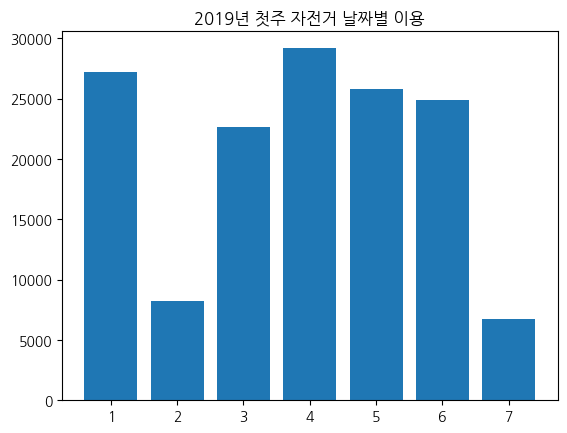

In [13]:
import matplotlib.pyplot as plt

plt.title('2019년 첫주 자전거 날짜별 이용')
plt.bar(bicycle.keys(), bicycle.values())
plt.show

#### date, datetime의 weekday()를 이용하여 요일 계산하기.

In [14]:
import datetime

# 0 = 월, 1 = 화, 2 = 수, 3 = 목, 4 = 금, 5 = 토, 6 = 일
print(datetime.date(2019, 10, 1).weekday())

1


#### 요일로 막대그래프 그리기

<function matplotlib.pyplot.show(close=None, block=None)>

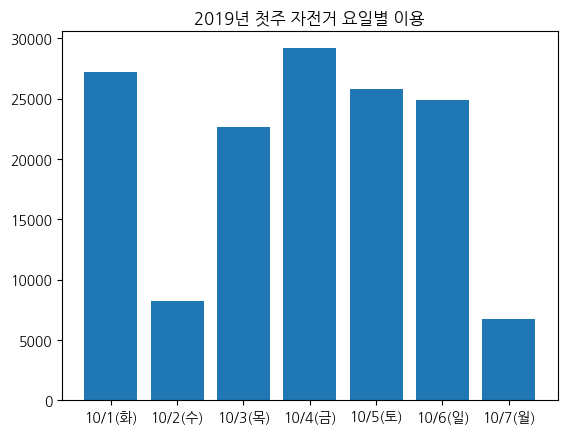

In [16]:
import matplotlib.pyplot as plt

plt.title('2019년 첫주 자전거 요일별 이용')
plt.bar(bicycle.keys(), bicycle.values())
plt.xticks(range(1,8), ('10/1(화)', '10/2(수)', '10/3(목)', '10/4(금)', '10/5(토)', '10/6(일)', '10/7(월)'))
plt.show

#### 히스토그램으로 그리기

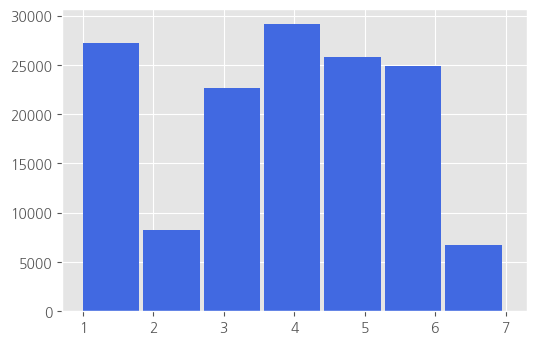

In [ ]:
day =[]     # 일자만 저장하는 리스트
for row in day
# 히스토그램


### 2. 공공자전거 1회 이용시 이동거리는 얼마나 될까?

In [ ]:
#이용거리
int(row[-1])

960

In [ ]:
#[0] 0~1km 미만, [1] 1~2km 미만, [2] 2~3km 미만 ... [10] 10km 이상
distance = [0 for i in range(11)]



[26386, 34821, 22185, 13794, 9664, 7041, 5477, 4386, 3590, 2766, 14652]


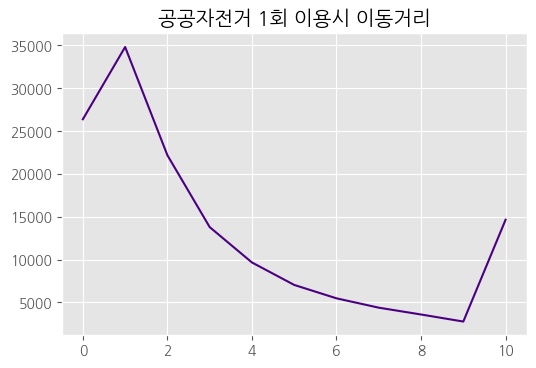

In [ ]:
# 선그래프 그리기

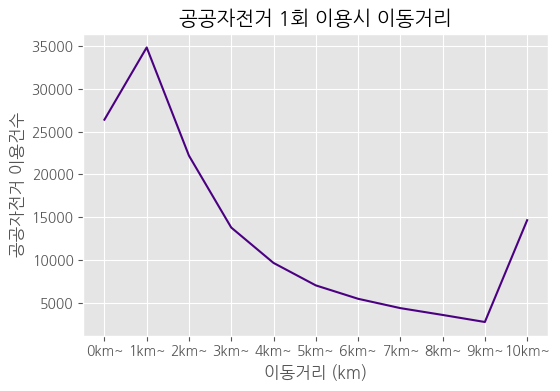

In [ ]:
# x축에 표기될 구간처리
distance_title = []


### 1회 이동 시 이용시간은 어떻게 될까?

In [ ]:
#10분간격으로 구간 나누기.
#[0]0~9분, [1] 10~19분, [2] 20~29분 ... [10] 100~109분 [11]110~119분 [12] 120분 이상
time = [0 for i in range(13)]


#x축에 표기될 구간

#그래프 그리기


### 3. 가장 많이 찾는 대여소는 어디일까?

##### 딕셔너리 정렬하는 방법

In [ ]:
dic = {'A' : 1, 'D' : 3, 'C' : 4, 'B' : 2}
#키(Key)로 정렬하기


[('A', 1), ('B', 2), ('C', 4), ('D', 3)]

In [ ]:
#값(value)으로 정렬하기


[('A', 1), ('B', 2), ('D', 3), ('C', 4)]

In [ ]:
#순서 거꾸로 정렬


[('C', 4), ('D', 3), ('B', 2), ('A', 1)]

##### 딕셔너리에 (대여소이름, 대여횟수) 쌍을 저장

In [ ]:
#딕셔너리에 (대여소이름, 대여횟수) 쌍을 저장
rent = {}


print(rent)

{'원자력 병원': 46, '면목역 3번출구': 26, '중계역 3번출구': 342, '현대6차 아파트': 173, '사근삼거리': 129, '극동늘푸른아파트': 115, '공릉1단지아파트': 396, '중계동 노원구민체육센터 옆(중1-2)': 253, '태릉입구역 8번출구': 200, '석관초등학교 앞': 56, '서울여대 남문': 123, '하계2동 공항버스정류장 옆': 467, '과기대 입구(우)': 537, '헬스케어': 218, '태릉입구역 5번출구': 266, '신도림역 1번 출구 앞': 827, '육군사관학교  앞': 106, '노원역1번출구': 688, '먹골역 6번출구 앞': 79, '봉화산역 5번출구 뒤': 63, '삼육대 도서관': 58, '중랑구청': 20, '노원 구민회관': 475, '용마문화복지센터': 6, '신내능말공원': 21, '중계역 6번출구': 499, '화랑대역 7번출구': 79, '군자지하보도 앞': 96, '공릉역 1번 출구 앞': 671, '흑석역 1번출구': 478, '화랑대역 2번출구 앞': 341, '성동세무서 부근': 50, '노들역 1번출구': 720, '도봉구청 옆(중랑천변)': 379, 'KT 노원점 건물 앞': 435, '성대입구 사거리': 10, '옥수역 3번출구': 288, '도봉구청 정문앞': 257, '티마크 호텔 앞': 10, '원묵고등학교': 46, '노원구청': 146, '백병원 사거리 농협은행 앞': 531, '중랑교사거리': 61, '외국어대 정문 앞': 58, '고속터미널역 8-1번, 8-2번 출구 사이': 1593, '중화빌딩 앞 (동부시장)': 42, '동해문화예술관앞': 250, '태릉입구역 3번출구': 137, '중화역 2번출구': 73, '석계역 5번출구 건너편': 166, '신내어울공원 앞': 29, '중계근린공원내': 431, '겸재교 진입부': 42, '홈플러스 신내점 앞': 74, '한내근린공원 남측': 102, '먹골역 1번출구 뒤': 58, '석계역 문화광장 내 자전

In [ ]:
#가장 많이 찾는 정류소 5개
import operator


{'봉림교 교통섬': 1626, '고속터미널역 8-1번, 8-2번 출구 사이': 1593, '신대방역 2번 출구': 1011, '동방1교': 1004, '한신16차아파트 119동 앞': 858}


#### 가로 막대그래프 그리기

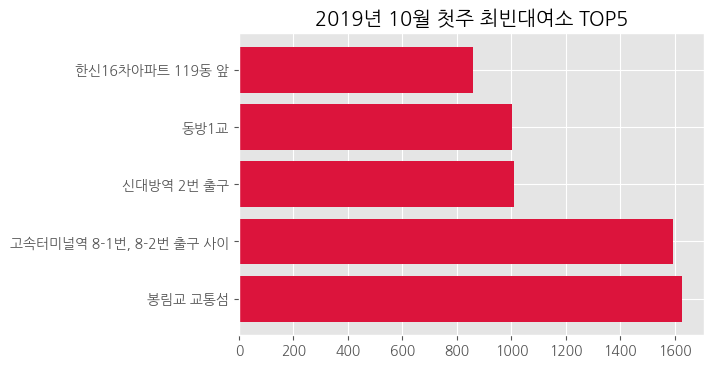

In [ ]:
#가로막대그래프 그리기

## 가장 많이 반납하는 대여소는 어디일까?

{'고속터미널역 8-1번, 8-2번 출구 사이': 2339, '봉림교 교통섬': 1739, '건대입구역 사거리(롯데백화점)': 1676, '마곡나루역 5번출구 뒤편': 1435, '올림픽공원역 3번출구': 1431}


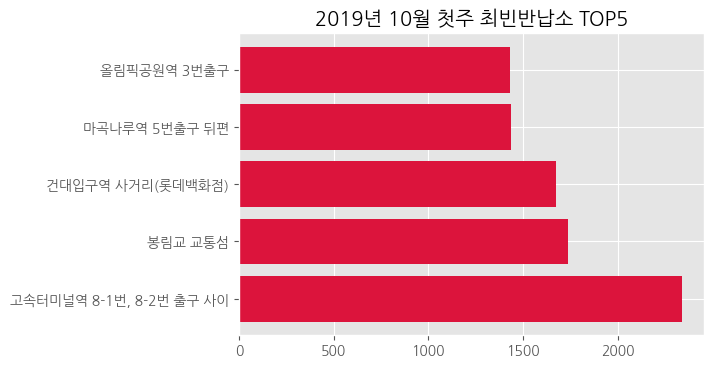

In [ ]:
#딕셔너리에 (대여소이름, 대여횟수) 쌍을 저장
rent = {}


#가장 많이 반납하는 정류소 5개
import operator


# 막대그래프 그리기
